# Load the data

In [94]:
import pandas as pd
import numpy as np

In [95]:
train_df = pd.read_csv('jupyter_notebooks/payanterm_tr/train.csv')
test_df = pd.read_csv('jupyter_notebooks/payanterm_tr/x_test.csv')

# Exploration

In [96]:
train_df.shape

(1100000, 21)

In [97]:
train_df.head()

,ID,Years Lived,Sex,Yearly Earnings,Relationship Status,Dependent Count,Academic Standing,Job Title,Wellness Index,Region,...,Prior Claims,Automobile Age,Financial Rating,Coverage Period,Coverage Commencement,Client Review,Tobacco Use,Physical Activity,Asset Category,Policy Cost
0,0,26.0,Man,8071.0,Unmarried,NaN,Secondary,NaN,17.927378,City,...,0.0,4.0,622.0,2.0,2024-06-10 15:21:39.261856,NaN,Smoker,Everyday,Residence,533.0
1,1,42.0,Man,49.0,Unmarried,2.0,Undergraduate,Jobless,49.828507,City,...,1.0,15.0,568.0,6.0,2023-01-06 15:21:39.272456,Moderate,Smoker,Once a Week,Unit,4795.0
2,2,52.0,Man,80793.0,Spouse,2.0,Doctorate,Jobless,27.539608,Exurban,...,2.0,2.0,467.0,7.0,2021-03-18 15:21:39.237118,Satisfactory,Non-Smoker,Seldom,Residence,151.0
3,3,33.0,Man,30663.0,Unmarried,1.0,Undergraduate,Freelancer,24.355045,Countryside,...,1.0,10.0,710.0,2.0,2023-08-28 15:21:39.102694,Unsatisfactory,Non-Smoker,Seldom,Residence,588.0
4,4,34.0,Man,59638.0,Spouse,0.0,Undergraduate,NaN,33.394840,Countryside,...,1.0,10.0,431.0,2.0,2024-03-17 15:21:39.171102,Unsatisfactory,Smoker,Once a Month,Residence,662.0


In [98]:
train_df.drop(['ID'], axis = 1, inplace = True)

In [99]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100000 entries, 0 to 1099999
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Years Lived            1082781 non-null  float64
 1   Sex                    1100000 non-null  object 
 2   Yearly Earnings        1058849 non-null  float64
 3   Relationship Status    1083018 non-null  object 
 4   Dependent Count        999297 non-null   float64
 5   Academic Standing      1100000 non-null  object 
 6   Job Title              771458 non-null   object 
 7   Wellness Index         1031954 non-null  float64
 8   Region                 1100000 non-null  object 
 9   Coverage Class         1100000 non-null  object 
 10  Prior Claims           766140 non-null   float64
 11  Automobile Age         1099994 non-null  float64
 12  Financial Rating       973595 non-null   float64
 13  Coverage Period        1099999 non-null  float64
 14  Coverage Commencem

In [100]:
train_df['Coverage Commencement'] = pd.to_datetime(train_df['Coverage Commencement'])

In [101]:
train_df.describe()

,Years Lived,Yearly Earnings,Dependent Count,Wellness Index,Prior Claims,Automobile Age,Financial Rating,Coverage Period,Coverage Commencement,Policy Cost
count,1.082781e+06,1.058849e+06,999297.000000,1.031954e+06,766140.000000,1.099994e+06,973595.000000,1.099999e+06,1100000,1.100000e+06
mean,4.114396e+01,3.273969e+04,2.009234,2.561357e+01,1.003279,9.573080e+00,593.003554,5.016976e+00,2022-02-13 08:32:49.434907392,1.102681e+03
min,1.800000e+01,1.000000e+00,0.000000,2.012237e+00,0.000000,0.000000e+00,300.000000,1.000000e+00,2019-08-17 15:21:39.080371,2.000000e+01
25%,3.000000e+01,7.991000e+03,1.000000,1.591814e+01,0.000000,5.000000e+00,468.000000,3.000000e+00,2020-11-20 15:21:39.211805952,5.140000e+02
50%,4.100000e+01,2.389700e+04,2.000000,2.458200e+01,1.000000,1.000000e+01,595.000000,5.000000e+00,2022-02-14 15:21:39.155230976,8.720000e+02
75%,5.300000e+01,4.463300e+04,3.000000,3.452768e+01,2.000000,1.500000e+01,721.000000,7.000000e+00,2023-05-06 15:21:39.192211968,1.509000e+03
max,6.400000e+01,1.499970e+05,4.000000,5.897591e+01,9.000000,1.900000e+01,849.000000,9.000000e+00,2024-08-15 15:21:39.287115,4.999000e+03
std,1.353912e+01,3.218211e+04,1.417255,1.220411e+01,0.983413,5.776708e+00,149.951723,2.594547e+00,NaN,8.650824e+02


In [102]:
train_df.isna().sum()

Years Lived               17219
Sex                           0
Yearly Earnings           41151
Relationship Status       16982
Dependent Count          100703
Academic Standing             0
Job Title                328542
Wellness Index            68046
Region                        0
Coverage Class                0
Prior Claims             333860
Automobile Age                6
Financial Rating         126405
Coverage Period               1
Coverage Commencement         0
Client Review             71297
Tobacco Use                   0
Physical Activity             0
Asset Category                0
Policy Cost                   0
dtype: int64

## Missing Data

Since we want to use Linear regression we can not have a missing data, so we fill all the missing data.

In [104]:
def fill_missing(df):
    data = df.copy()

    # Coverage Commencement
    # introduce year and month column, drop the coverage commencement column
    data['Coverage Commencement'] = pd.to_datetime(data['Coverage Commencement'])
    data['Month'] = data['Coverage Commencement'].dt.month
    data['Year'] = data['Coverage Commencement'].dt.year
    data.drop('Coverage Commencement', axis = 1, inplace = True)
    
    # Coverage Period
    # filled with mode
    data.fillna({'Coverage Period' : data['Coverage Period'].mode()[0]}, inplace = True)
    
    # Automobile Age
    # filled with mode
    data.fillna({'Automobile Age' : data['Automobile Age'].mode()[0]}, inplace = True)

    # Years Lived
    # filled with mode
    data.fillna({'Years Lived' : data['Years Lived'].mean()}, inplace = True)

    # Relationship Status
    # we add a fourth label named Unkown for the values that we dont know because the distrubution of data seems uniform.
    # if we fill the data with any of the other labels the distrubution would be changed
    
    data.fillna({'Relationship Status':'Unkown'}, inplace = True)

    # Prior Claims
    # filled with mean
    data.fillna({'Prior Claims' : data['Prior Claims'].mean()}, inplace = True)

    # Client Review
    # we add a fourth label named Unkown for the values that we dont know because the distrubution of data seems uniform.
    # if we fill the data with any of the other labels the distrubution would be changed
    
    data.fillna({'Client Review':'Unkown'}, inplace = True)

    # Wellness Index
    # filled with mean
    data.fillna({'Wellness Index' : data['Wellness Index'].mean()}, inplace = True)

    # Yealy Earnings
    # filled with 0.5 quantile because mean and mode has no meaning for incomes. 
    # (mean of our classes' networth and bill gate's would be in billions but only billgates is a  billioner)
    data.fillna({'Yearly Earnings' : data['Yearly Earnings'].quantile(0.5)}, inplace = True)

    # 'Job Title'
    # we add a fourth label named Unkown for the values that we dont know because the distrubution of data seems uniform.
    # if we fill the data with any of the other labels the distrubution would be changed
    data.fillna({'Job Title':'Unkown'}, inplace = True)

    # Dependent Count
    # we add a fourth amount (-1) for the values that we dont know because the distrubution of data seems uniform.
    # if we fill the data with any of the other labels the distrubution would be changed
    data.fillna({'Dependent Count': -1 }, inplace = True)

    # Financial Rating
    # filled with mean
    data.fillna({'Financial Rating' : data['Financial Rating'].mean()}, inplace = True)

    # we add bunch of new data to introduce none linear parameters to our linear regression
    # earning/dependent
    data['earning/dependent'] = data['Yearly Earnings'] / (data['Dependent Count']+2)

    # earning/wellness
    data['earning/wellness'] = data['Yearly Earnings'] / (data['Wellness Index']+1)

    # Yearly Earnings / Years Lived
    data['earning/lived'] = data['Yearly Earnings'] / (data['Years Lived']+1)

    # Automobile Age / Years Lived
    data['automobile/lived'] = data['Automobile Age'] / (data['Years Lived']+1)

    # Prior Claims / Years Lived
    data['claims/lived'] = data['Prior Claims'] / (data['Years Lived']+1)

    # Wellness Index / Years Lived
    data['wellness/lived'] = data['Wellness Index'] / (data['Years Lived']+1)    

    # log(earnings)
    data['log(earnings)'] = np.log(data['Yearly Earnings']+1)

    # Automobile Age * Prior Claims
    data['automobile*claims'] = data['Automobile Age'] * data['Prior Claims']
    
    # Yearly Earnings * Financial Rating
    data['earnings*rating'] = data['Yearly Earnings'] * data['Financial Rating']

    # 'Lifestyle_Risk' = if all of the factors are bellow average then u get a 3
    data['Lifestyle_Risk'] = ((data['Tobacco Use'] == 'Smoker') * 1 + (data['Physical Activity'] == 'Seldom') * 1 + (data['Wellness Index'] < data['Wellness Index'].mean()) * 1 )
    
    return data
    

In [105]:
train_df = fill_missing(train_df)

In [106]:
train_df.isna().sum()

Years Lived            0
Sex                    0
Yearly Earnings        0
Relationship Status    0
Dependent Count        0
Academic Standing      0
Job Title              0
Wellness Index         0
Region                 0
Coverage Class         0
Prior Claims           0
Automobile Age         0
Financial Rating       0
Coverage Period        0
Client Review          0
Tobacco Use            0
Physical Activity      0
Asset Category         0
Policy Cost            0
Month                  0
Year                   0
earning/dependent      0
earning/wellness       0
earning/lived          0
automobile/lived       0
claims/lived           0
wellness/lived         0
log(earnings)          0
automobile*claims      0
earnings*rating        0
Lifestyle_Risk         0
dtype: int64

## One Hot Encoding

In [107]:
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()

train_df_encoded = pd.get_dummies(train_df, columns=categorical_cols)

In [108]:
train_df_encoded.head()

,Years Lived,Yearly Earnings,Dependent Count,Wellness Index,Prior Claims,Automobile Age,Financial Rating,Coverage Period,Policy Cost,Month,...,Client Review_Unsatisfactory,Tobacco Use_Non-Smoker,Tobacco Use_Smoker,Physical Activity_Everyday,Physical Activity_Once a Month,Physical Activity_Once a Week,Physical Activity_Seldom,Asset Category_Flat,Asset Category_Residence,Asset Category_Unit
0,26.0,8071.0,-1.0,17.927378,0.0,4.0,622.0,2.0,533.0,6,...,False,False,True,True,False,False,False,False,True,False
1,42.0,49.0,2.0,49.828507,1.0,15.0,568.0,6.0,4795.0,1,...,False,False,True,False,False,True,False,False,False,True
2,52.0,80793.0,2.0,27.539608,2.0,2.0,467.0,7.0,151.0,3,...,False,True,False,False,False,False,True,False,True,False
3,33.0,30663.0,1.0,24.355045,1.0,10.0,710.0,2.0,588.0,8,...,True,True,False,False,False,False,True,False,True,False
4,34.0,59638.0,0.0,33.394840,1.0,10.0,431.0,2.0,662.0,3,...,True,False,True,False,True,False,False,False,True,False


In [109]:
train_df_encoded.shape

(1100000, 54)

In [110]:
train_df_encoded.isna().sum().sum()

0

# Random Forest

MSE: 568028.2489555443


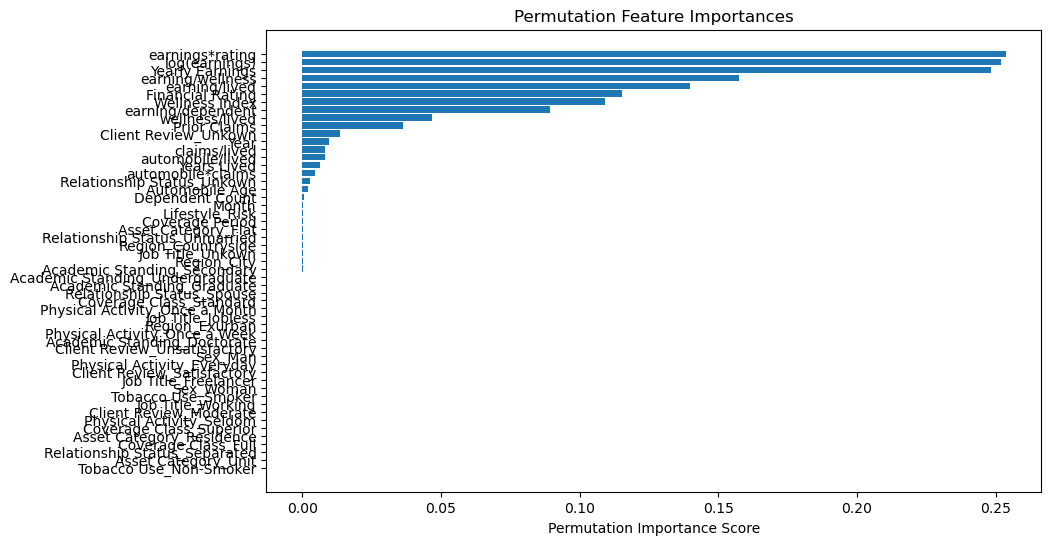

In [126]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# features
X = train_df_encoded.drop('Policy Cost', axis=1)  

# target
# we replace the normal value of the target by its np.log1p() for better result of the scoring metric (RMSLE)
# later we use np.expm1() to return the target to its original scale
# y = train_df_encoded['Policy Cost']              
y = np.log1p(train_df_encoded['Policy Cost'])              

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=473)

#Initialize and train Random Forest
rf_model = RandomForestRegressor(n_estimators=50,n_jobs=-1, random_state=473)
rf_model.fit(X_train, y_train)

# feature importance
# we use feature importance to see if the columns that we added to data has any effect on our prediction. (they do)
result = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=473)

# Create DataFrame
perm_importance_df = pd.DataFrame({'Feature': X_train.columns,'Importance': result.importances_mean}).sort_values('Importance', ascending=False)

predictions = np.expm1(rf_model.predict(X_test))
predictions[predictions < 0] = 0

print("MSE:", mean_squared_error(y_test, predictions))

# Plot
plt.figure(figsize=(10, 6))
plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance'])
plt.xlabel('Permutation Importance Score')
plt.title('Permutation Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [129]:
# top 18 important features
list(perm_importance_df['Feature'][:18])

['earnings*rating',
 'log(earnings)',
 'Yearly Earnings',
 'earning/wellness',
 'earning/lived',
 'Financial Rating',
 'Wellness Index',
 'earning/dependent',
 'wellness/lived',
 'Prior Claims',
 'Client Review_Unkown',
 'Year',
 'claims/lived',
 'automobile/lived',
 'Years Lived',
 'automobile*claims',
 'Relationship Status_Unkown',
 'Automobile Age']

In [128]:
# all the features with their importance
perm_importance_df

,Feature,Importance
18,earnings*rating,2.537113e-01
16,log(earnings),2.520171e-01
1,Yearly Earnings,2.480922e-01
11,earning/wellness,1.575328e-01
12,earning/lived,1.396242e-01
6,Financial Rating,1.152307e-01
3,Wellness Index,1.092294e-01
10,earning/dependent,8.945869e-02
15,wellness/lived,4.684177e-02
4,Prior Claims,3.634769e-02


In [43]:
perm_importance_df.to_csv('jupyter_notebooks/payanterm_tr/perm_importance.csv', index = False)

In [137]:
# features
X = train_df_encoded.drop('Policy Cost', axis = 1)  

# target
y = np.log1p(train_df_encoded['Policy Cost'])               

# train test spilit
# we could use the most important features for faster training with minimum loss of the accuracy

# X_train, X_test, y_train, y_test = train_test_split(X[list(perm_importance_df['Feature'][:18])], y, test_size=0.2, random_state=473)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=473)

#Initialize and train Random Forest
rf_model = RandomForestRegressor(n_estimators=50,n_jobs = -1,  random_state=473)

rf_model.fit(X_train, y_train)

# Make predictions and evaluate
predictions = np.expm1(rf_model.predict(X_test))
predictions[predictions < 0] = 0

# For regression:
print("MSE:", mean_squared_error(y_test, predictions))

MSE: 568028.2489555443


In [140]:
test = pd.read_csv('jupyter_notebooks/payanterm_tr/x_test.csv')

test = fill_missing(test)

test_id = test['ID']
test.drop(['ID'], axis = 1, inplace = True)

test_encoded = pd.get_dummies(test, columns=categorical_cols)

# predictions = rf_model.predict(test_encoded[list(perm_importance_df['Feature'][:18])])
predictions = rf_model.predict(test_encoded)


predictions = np.expm1(predictions)
predictions[predictions < 0] = 0

# predictions = rf_model.predict(test_encoded)

answer_df = pd.DataFrame({'ID':test_id, 'Policy Cost' : predictions})

In [141]:
answer_df.head()

,ID,Policy Cost
0,0,821.497946
1,1,1046.908318
2,2,718.931770
3,3,546.563097
4,4,1063.132363


In [142]:
answer_df.to_csv('jupyter_notebooks/payanterm_tr/nplog_func+_randomforest.csv', index = False)

# XGBoost

In [143]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

# features
X = train_df_encoded.drop('Policy Cost', axis=1) 
# target
y = np.log1p(train_df_encoded['Policy Cost'])              

# train test spilit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=473)

#Initialize and train
xgb_model = XGBRegressor(n_estimators=1000, gamma = 0.01, learning_rate=0.01, subsample = 0.9, colsample_bytree = 0.8, random_state=473)
xgb_model.fit(X_train, y_train)


predictions = np.expm1(xgb_model.predict(X_test))
predictions[predictions < 0] = 0

print("MSE:", mean_squared_error(y_test, predictions))

MSE: 582103.1250374506


In [144]:
test = pd.read_csv('jupyter_notebooks/payanterm_tr/x_test.csv')

test = fill_missing(test)

test_id = test['ID']
test.drop(['ID'], axis = 1, inplace = True)

test_encoded = pd.get_dummies(test, columns=categorical_cols)

predictions = np.expm1(xgb_model.predict(test_encoded))
predictions[predictions < 0] = 0

answer_df = pd.DataFrame({'ID':test_id, 'Policy Cost' : predictions})

In [146]:
answer_df.to_csv('jupyter_notebooks/payanterm_tr/nplog_func+_xgb+.csv', index = False)

## feature importance

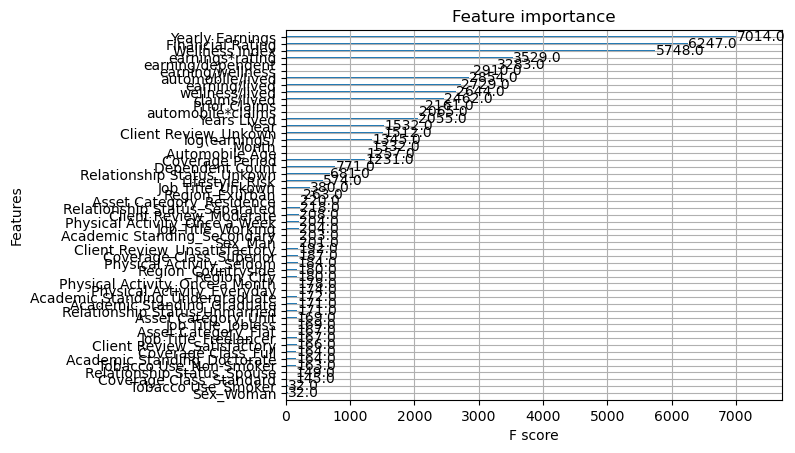

In [147]:
import xgboost as xgb
importance = xgb_model.get_booster().get_score(importance_type='weight')

# Plot
xgb.plot_importance(xgb_model)
plt.show()

# Linear Regression

In [124]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# features
Z = train_df_encoded
X = Z.drop('Policy Cost', axis=1)  

# target
y = np.log1p(Z['Policy Cost'])               



# train test spilit
# X_train, X_test, y_train, y_test = train_test_split(X[list(perm_importance_df['Feature'][:17])], y, test_size=0.2, random_state=473)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=473)


model = LinearRegression()
model.fit(X_train, y_train)

predictions = np.expm1(model.predict(X_test))
predictions[predictions < 0] = 0

print("MSE:", mean_squared_error(y_test, predictions))

MSE: 544703.25037089


In [125]:
test = pd.read_csv('jupyter_notebooks/payanterm_tr/x_test.csv')

test = fill_missing(test)

test_id = test['ID']
test.drop(['ID'], axis = 1, inplace = True)

test_encoded = pd.get_dummies(test, columns=categorical_cols)

# predictions = model.predict(test_encoded[list(perm_importance_df['Feature'][:17])])

predictions = np.expm1(model.predict(test_encoded))
predictions[predictions < 0] = 0


answer_df = pd.DataFrame({'ID':test_id, 'Policy Cost' : predictions})


answer_df.to_csv('jupyter_notebooks/payanterm_tr/nplog_func++_Linear.csv', index = False)

# Ridge, lasso ElasticNet

In [152]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# features
Z = train_df_encoded
X = Z.drop('Policy Cost', axis=1)

# target
y = np.log1p(Z['Policy Cost'])


# train test spilit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=473)

# train
model = ElasticNet(alpha=1)  
# model = Ridge(alpha=1)  
# model = Lasso(alpha=1)  

model.fit(X_train, y_train)


predictions = np.expm1(model.predict(X_test))
predictions[predictions < 0] = 0

print("MSE:", mean_squared_error(y_test, predictions))

MSE: 538437.1110999174


In [153]:
test = pd.read_csv('jupyter_notebooks/payanterm_tr/x_test.csv')

test = fill_missing(test)

test_id = test['ID']
test.drop(['ID'], axis = 1, inplace = True)


test_encoded = pd.get_dummies(test, columns=categorical_cols)

predictions = np.expm1(model.predict(test_encoded))
predictions[predictions < 0] = 0

answer_df = pd.DataFrame({'ID':test_id, 'Policy Cost' : predictions})

answer_df.to_csv('jupyter_notebooks/payanterm_tr/nplog_func++_elastic.csv', index = False)